In [1]:
from figures_import_helper import *

In [2]:
file, deviations =  'bc_collusion.csv', [-.025, .0, .001]
 
data = auction_data.AuctionData(os.path.join(path_data, file))


data_before = auction_data.AuctionData(
    data.df_bids.loc[data.data.before == 1])

data_after = auction_data.AuctionData(
    data.df_bids.loc[data.data.before.isnull()])

this_data = data_before

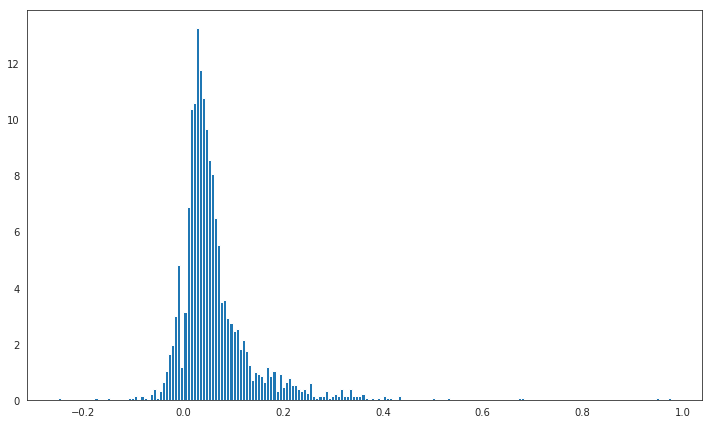

In [3]:
delta = this_data.df_bids.norm_bid - this_data.df_bids.most_competitive
hist_plot(delta)

In [4]:
k = 1

demands = [this_data.get_counterfactual_demand(rho)
           for rho in deviations]

constraints = [
    environments.MarkupConstraint(
        max_markup=.5, min_markup=.02),
    environments.InformationConstraint(k=k, sample_demands=demands)
]

In [5]:
this_solver = analytics.MinCollusionIterativeSolver(
    data=this_data,
    deviations=deviations,
    metric=analytics.IsNonCompetitive,
    plausibility_constraints=constraints,
    num_points=3000,
    seed=0,
    project=False,
    filter_ties=None,
    number_iterations=50,
    confidence_level=.986,
    moment_matrix=auction_data.moment_matrix(deviations, 'slope'),
    moment_weights=np.identity(3)
    #np.array((len(deviations)-1) * [0] + [1])
)

In [6]:
this_solver.tolerance

array([[3.53741603e-04],
       [2.37463288e-04],
       [5.29375946e-07]])

In [7]:
this_solver.demands

array([0.27693536, 0.09696728, 0.09656824])

In [8]:
this_solver.result.solution

0.5226406570464919